In [33]:
#Importing packages
import requests
import pandas as pd

In [34]:
#DMI requires a key to access their API
api_key = '12a4bffe-21d5-4154-96e5-12bf959cc1dd'

In [35]:
#Request API - observation
url = 'https://dmigw.govcloud.dk/metObs/v1/observation'
r = requests.get(url ,params={'api-key': api_key})
print(r, r.url)

<Response [200]> https://dmigw.govcloud.dk/metObs/v1/observation?api-key=12a4bffe-21d5-4154-96e5-12bf959cc1dd


In [36]:
#Extract JSON data
json = r.json()

In [37]:
#Convert JSON data to pandas dataframe
df = pd.DataFrame(json)
df

,_id,parameterId,stationId,timeCreated,timeObserved,value
0,7f895050-e4c6-11ea-8135-46818c941500,precip_dur_past10min,05300,1.598135e+15,1.598135e+15,0.0
1,7f893f16-e4c6-11ea-b6ca-8e6a186fc6ce,precip_past10min,05300,1.598135e+15,1.598135e+15,0.0
2,d262df90-e4c5-11ea-abf8-bea6434b3bf8,visibility,04320,1.598135e+15,1.598135e+15,50000.0
3,d262dbee-e4c5-11ea-abf8-bea6434b3bf8,cloud_height,04320,1.598135e+15,1.598135e+15,1250.0
4,d262d57c-e4c5-11ea-abf8-bea6434b3bf8,cloud_cover,04320,1.598135e+15,1.598135e+15,100.0
...,...,...,...,...,...,...
995,325837d0-e4c4-11ea-b6ca-8e6a186fc6ce,pressure_at_sea,06174,1.598134e+15,1.598134e+15,1009.9
996,32583604-e4c4-11ea-b6ca-8e6a186fc6ce,pressure,06174,1.598134e+15,1.598134e+15,1007.4
997,32583546-e4c4-11ea-8135-46818c941500,precip_dur_past10min,06174,1.598134e+15,1.598134e+15,0.0
998,32583370-e4c4-11ea-b6ca-8e6a186fc6ce,precip_past10min,06174,1.598134e+15,1.598134e+15,0.0


In [38]:
#Creating a new time variable with format YYYY-MM-DD HH:MM:SS
df['time'] = pd.to_datetime(df['timeObserved'], unit='us')
df['time']

0     2020-08-22 22:20:00
1     2020-08-22 22:20:00
2     2020-08-22 22:20:00
3     2020-08-22 22:20:00
4     2020-08-22 22:20:00
              ...        
995   2020-08-22 22:10:00
996   2020-08-22 22:10:00
997   2020-08-22 22:10:00
998   2020-08-22 22:10:00
999   2020-08-22 22:10:00
Name: time, Length: 1000, dtype: datetime64[ns]

In [13]:
#We explore the data - here the different observed weather data
#We are interested in temp_dry according to DMI it is the "Present air temperature measured 2 m over terrain"
parameter_ids = df['parameterId'].unique() 
parameter_ids

array(['wind_speed', 'wind_max', 'wind_dir', 'temp_grass', 'temp_dry',
       'temp_dew', 'sun_last10min_glob', 'radia_glob', 'temp_soil',
       'pressure_at_sea', 'pressure', 'precip_past10min', 'humidity',
       'leav_hum_dur_past10min', 'visib_mean_last10min', 'weather',
       'visibility', 'cloud_cover', 'precip_dur_past10min',
       'cloud_height'], dtype=object)

In [39]:
#Sort relevant data
df2 = df.loc[(df['parameterId']=='temp_dry')].copy() 
df2.head()

,_id,parameterId,stationId,timeCreated,timeObserved,value,time
10,d262a5ca-e4c5-11ea-895a-167819f21958,temp_dry,04320,1.598135e+15,1.598135e+15,6.5,2020-08-22 22:20:00
20,c591dcb2-e4c5-11ea-895a-167819f21958,temp_dry,04272,1.598135e+15,1.598135e+15,6.2,2020-08-22 22:20:00
27,af37ebfa-e4c5-11ea-895a-167819f21958,temp_dry,06197,1.598135e+15,1.598135e+15,19.0,2020-08-22 22:20:00
43,ad21c9bc-e4c5-11ea-895a-167819f21958,temp_dry,06123,1.598135e+15,1.598135e+15,18.6,2020-08-22 22:20:00
56,acd92d9c-e4c5-11ea-895a-167819f21958,temp_dry,04250,1.598135e+15,1.598135e+15,4.8,2020-08-22 22:20:00


In [18]:
#We explore the data pt. 2 - here the different stations where the weather data is optained
#We need to substract the non danish stations
parameter_ids2 = df['stationId'].unique() 
parameter_ids2

array(['06197', '06123', '04250', '06119', '06169', '06151', '04271',
       '06072', '06081', '06049', '06073', '06093', '06088', '06154',
       '06149', '06124', '06074', '06132', '06147', '06135', '06065',
       '06188', '06193', '06159', '04220', '06019', '06096', '06183',
       '06186', '04339', '06187', '06051', '06174', '06082', '06156',
       '06079', '06056', '06058', '06116', '06102', '06031', '06041',
       '06032', '06141', '06184', '06136', '06138', '06126', '06168',
       '06181', '04390', '06068', '05300', '05880', '04320', '04272'],
      dtype=object)

In [19]:
#Request API - station
url = 'https://dmigw.govcloud.dk/metObs/v1/station'
r = requests.get(url ,params={'api-key': api_key})
print(r, r.url)

<Response [200]> https://dmigw.govcloud.dk/metObs/v1/station?api-key=12a4bffe-21d5-4154-96e5-12bf959cc1dd


In [20]:
#Extract JSON data - station
json_station = r.json()

In [21]:
#Convert JSON data to pandas dataframe - station
df_station = pd.DataFrame(json_station)
df_station

,_id,country,instrumentParameter,location,name,owner,parameterId,regionId,stationId,status,timeCreated,timeOperationFrom,timeOperationTo,timeUpdated,timeValidFrom,timeValidTo,type,wmoCountryCode,wmoStationId
0,03332ae2-8b67-4f23-92cf-2008a6ceb477,DNK,[],"{'height': None, 'latitude': 55.3286, 'longitu...",Ribe Renseanlæg,DMI,"[snow_depth_man, snow_cover_man]",None,25339,Active,1583338006016000,1317427200000000,None,None,1317427200000000,None,Manual snow,None,None
1,05176251-748b-41a8-87a6-5df83567e128,GRL,"[{'parameterId': 'bar_height', 'value': 83.7}]","{'height': 79.65, 'latitude': 64.1833, 'longit...",Nuuk,DMI,"[cloud_height, humidity_past1h, humidity, prec...",4,04250,Active,1583338006016000,683683200000000,None,None,683683200000000,None,Synop,6070,04250
2,08b14664-5cc1-470b-ba8e-a49e84bca83e,DNK,[],"{'height': 38, 'latitude': 55.7246, 'longitude...",Skovlund,DMI,"[precip_past10min, precip_dur_past1h, precip_d...",6,05320,Active,1583338006016000,1319760000000000,None,None,1319760000000000,None,Pluvio,None,None
3,0911d008-aba8-48ae-8289-f495dd8333f6,DNK,[],"{'height': 7, 'latitude': 56.9564, 'longitude'...",Møllegård Huse,DMI,"[precip_past24h, precip_past1h, precip_past10m...",6,05042,Active,1583338006016000,1414627200000000,None,None,1414627200000000,None,Pluvio,None,None
4,091c6f08-5de3-453a-892b-314308400d4f,DNK,[],"{'height': None, 'latitude': 55.7161, 'longitu...",Meteorologisk Institut,DMI,"[snow_depth_man, snow_cover_man]",None,30215,Active,1583338006016000,1517529600000000,None,None,1517529600000000,None,Manual snow,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,f7cd1393-fe79-4593-ad82-52440437ec7a,DNK,[],"{'height': 22, 'latitude': 57.2215, 'longitude...",Voerså Hede,DMI,"[precip_past10min, precip_past24h, precip_past...",6,05035,Active,1583338006016000,1260921600000000,None,None,1260921600000000,None,Pluvio,None,None
207,f97d6442-e1aa-4ebf-8b56-bef1fd1966f6,DNK,"[{'parameterId': 'bar_height', 'value': 62.04}]","{'height': 60.33, 'latitude': 56.3027, 'longit...",Ødum,DMI,"[humidity, humidity_past1h, leav_hum_dur_past1...",6,06072,Active,1583338006016000,991008000000000,None,None,991008000000000,None,Synop,6080,06072
208,faeb7e18-2775-486b-bb16-c0e23f83984a,DNK,[],"{'height': 63, 'latitude': 55.4935, 'longitude...",Båring,DMI,"[precip_past1h, precip_past24h, precip_dur_pas...",6,05400,Active,1583338006016000,1320364800000000,None,None,1320364800000000,None,Pluvio,None,None
209,fe39f145-fdb2-4e9a-9507-d03a4342cbb8,DNK,[],"{'height': None, 'latitude': 55.723, 'longitud...",Outrup,DMI,"[snow_depth_man, snow_cover_man]",None,25045,Active,1583338006016000,1351123200000000,None,None,1351123200000000,None,Manual snow,None,None


In [22]:
#We explore the station data - here the different countries represented
#We are interested in DNK only
parameter_ids_station = df_station['country'].unique() 
parameter_ids_station

array(['DNK', 'GRL'], dtype=object)

In [23]:
#Sort relevant data - station
df_station2 =df_station.loc[(df_station['country']=='DNK')].copy()
df_station2

,_id,country,instrumentParameter,location,name,owner,parameterId,regionId,stationId,status,timeCreated,timeOperationFrom,timeOperationTo,timeUpdated,timeValidFrom,timeValidTo,type,wmoCountryCode,wmoStationId
0,03332ae2-8b67-4f23-92cf-2008a6ceb477,DNK,[],"{'height': None, 'latitude': 55.3286, 'longitu...",Ribe Renseanlæg,DMI,"[snow_depth_man, snow_cover_man]",None,25339,Active,1583338006016000,1317427200000000,None,None,1317427200000000,None,Manual snow,None,None
2,08b14664-5cc1-470b-ba8e-a49e84bca83e,DNK,[],"{'height': 38, 'latitude': 55.7246, 'longitude...",Skovlund,DMI,"[precip_past10min, precip_dur_past1h, precip_d...",6,05320,Active,1583338006016000,1319760000000000,None,None,1319760000000000,None,Pluvio,None,None
3,0911d008-aba8-48ae-8289-f495dd8333f6,DNK,[],"{'height': 7, 'latitude': 56.9564, 'longitude'...",Møllegård Huse,DMI,"[precip_past24h, precip_past1h, precip_past10m...",6,05042,Active,1583338006016000,1414627200000000,None,None,1414627200000000,None,Pluvio,None,None
4,091c6f08-5de3-453a-892b-314308400d4f,DNK,[],"{'height': None, 'latitude': 55.7161, 'longitu...",Meteorologisk Institut,DMI,"[snow_depth_man, snow_cover_man]",None,30215,Active,1583338006016000,1517529600000000,None,None,1517529600000000,None,Manual snow,None,None
5,0a102dbe-87a7-4df8-b93b-77f8d535c178,DNK,[],"{'height': 44, 'latitude': 54.9316, 'longitude...",Kliplev,DMI,"[precip_past10min, precip_dur_past1h, precip_d...",6,05365,Active,1583338006016000,1317168000000000,None,None,1317168000000000,None,Pluvio,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,f7cd1393-fe79-4593-ad82-52440437ec7a,DNK,[],"{'height': 22, 'latitude': 57.2215, 'longitude...",Voerså Hede,DMI,"[precip_past10min, precip_past24h, precip_past...",6,05035,Active,1583338006016000,1260921600000000,None,None,1260921600000000,None,Pluvio,None,None
207,f97d6442-e1aa-4ebf-8b56-bef1fd1966f6,DNK,"[{'parameterId': 'bar_height', 'value': 62.04}]","{'height': 60.33, 'latitude': 56.3027, 'longit...",Ødum,DMI,"[humidity, humidity_past1h, leav_hum_dur_past1...",6,06072,Active,1583338006016000,991008000000000,None,None,991008000000000,None,Synop,6080,06072
208,faeb7e18-2775-486b-bb16-c0e23f83984a,DNK,[],"{'height': 63, 'latitude': 55.4935, 'longitude...",Båring,DMI,"[precip_past1h, precip_past24h, precip_dur_pas...",6,05400,Active,1583338006016000,1320364800000000,None,None,1320364800000000,None,Pluvio,None,None
209,fe39f145-fdb2-4e9a-9507-d03a4342cbb8,DNK,[],"{'height': None, 'latitude': 55.723, 'longitud...",Outrup,DMI,"[snow_depth_man, snow_cover_man]",None,25045,Active,1583338006016000,1351123200000000,None,None,1351123200000000,None,Manual snow,None,None


In [24]:
#Sort station ID
stations=df_station2['stationId']
stations

0      25339
2      05320
3      05042
4      30215
5      05365
       ...  
206    05035
207    06072
208    05400
209    25045
210    06068
Name: stationId, Length: 185, dtype: object

In [40]:
#data period
end_time = pd.datetime.today()
start_time = pd.datetime(2018,8,1)

def funk(dt):
    '''Function converting a datetime objects to a Unix microsecond string'''
    return str(int(pd.to_datetime(dt).value*10**-3))

#Specify query parameters
params = {'api-key' : api_key,
          'from' : datetime_to_unixtime(start_time),
          'to' : datetime_to_unixtime(end_time),
          'parameterId' : 'temp_dry',
          }


r = requests.get(url, params=params) # submit GET request based on url and headers
print(r, r.url) # Print request status and url

<Response [200]> https://dmigw.govcloud.dk/metObs/v1/observation?api-key=12a4bffe-21d5-4154-96e5-12bf959cc1dd&from=1533081600000000&to=1598142408299385&parameterId=temp_dry


In [57]:
#data period
end_time = pd.datetime.today()
start_time = pd.datetime(2018,1,1)

def datetime_to_unixtime(dt):
    '''Function converting a datetime objects to a Unix microsecond string'''
    return str(int(pd.to_datetime(dt).value*10**-3))

#Specify query parameters
params = {'api-key' : api_key,
          'from' : datetime_to_unixtime(start_time),
          'to' : datetime_to_unixtime(end_time),
          'stationId' : '06184',
          'parameterId' : 'temp_dry',
          'limit' : '1000000000000000',
          }


r = requests.get(url, params=params) # submit GET request based on url and headers
print(r, r.url) # Print request status and url
 #https://dmigw.govcloud.dk/metObs/v1/observation?api-key=12a4bffe-21d5-4154-96e5-12bf959cc1dd
  #      &from=1578614400000000&to=1598139376986196&stationId=06188&limit=1000000000000

<Response [200]> https://dmigw.govcloud.dk/metObs/v1/observation?api-key=12a4bffe-21d5-4154-96e5-12bf959cc1dd&from=1514764800000000&to=1598143977630724&stationId=06184&parameterId=temp_dry&limit=1000000000000000


In [60]:
json = r.json() # Extract JSON object
df = pd.DataFrame(json) # Convert JSON object to a DataFrame

df['time'] = pd.to_datetime(df['timeObserved'], unit='us') # Set the DataFrame index as the observation time

df = df.drop(['_id', 'timeCreated', 'timeObserved'], axis=1) # Delete unused columns

df.index = df['time'] # Set the time as the index
#udvælger temp_dry: Present air temperature measured 2 m over terrain every 10 min
#vejr=df.loc[(df['parameterId'] == 'temp_dry')].copy()
#vejr
#"df2 = df.loc[(df['parameterId']=='temp_dry')].copy() # Set the time as the index

print(df.head()) # Print the first five rows
df

parameterId stationId  value                time
time                                                                
2020-08-22 22:50:00    temp_dry     06184   17.6 2020-08-22 22:50:00
2020-08-22 22:40:00    temp_dry     06184   17.8 2020-08-22 22:40:00
2020-08-22 22:30:00    temp_dry     06184   17.8 2020-08-22 22:30:00
2020-08-22 22:20:00    temp_dry     06184   18.0 2020-08-22 22:20:00
2020-08-22 22:10:00    temp_dry     06184   18.0 2020-08-22 22:10:00


,parameterId,stationId,value,time
time,,,,
2020-08-22 22:50:00,temp_dry,06184,17.6,2020-08-22 22:50:00
2020-08-22 22:40:00,temp_dry,06184,17.8,2020-08-22 22:40:00
2020-08-22 22:30:00,temp_dry,06184,17.8,2020-08-22 22:30:00
2020-08-22 22:20:00,temp_dry,06184,18.0,2020-08-22 22:20:00
2020-08-22 22:10:00,temp_dry,06184,18.0,2020-08-22 22:10:00
...,...,...,...,...
2018-01-01 00:40:00,temp_dry,06184,7.6,2018-01-01 00:40:00
2018-01-01 00:30:00,temp_dry,06184,7.6,2018-01-01 00:30:00
2018-01-01 00:20:00,temp_dry,06184,7.6,2018-01-01 00:20:00


In [61]:
import numpy as np
df['time2']=df.time.astype(str).str[:10].copy()
df


,parameterId,stationId,value,time,time2
time,,,,,
2020-08-22 22:50:00,temp_dry,06184,17.6,2020-08-22 22:50:00,2020-08-22
2020-08-22 22:40:00,temp_dry,06184,17.8,2020-08-22 22:40:00,2020-08-22
2020-08-22 22:30:00,temp_dry,06184,17.8,2020-08-22 22:30:00,2020-08-22
2020-08-22 22:20:00,temp_dry,06184,18.0,2020-08-22 22:20:00,2020-08-22
2020-08-22 22:10:00,temp_dry,06184,18.0,2020-08-22 22:10:00,2020-08-22
...,...,...,...,...,...
2018-01-01 00:40:00,temp_dry,06184,7.6,2018-01-01 00:40:00,2018-01-01
2018-01-01 00:30:00,temp_dry,06184,7.6,2018-01-01 00:30:00,2018-01-01
2018-01-01 00:20:00,temp_dry,06184,7.6,2018-01-01 00:20:00,2018-01-01


In [62]:
#Remove the word 'Landsdel' from province#
#Ecommute50.province = commute50.province.astype(str).str[9:] 
A= np.mean(df.value.loc[df['time2']=='2020-08-22'])
c= np.mean(df.value.loc[df['time2']=='2020-08-21'])
B= np.mean(df.value)
#c= np.mean(df.value.loc[df['stationId']=='06188'])
#avr_date=np.mean(df.value.loc[df[('time2'=='2020-08-22')])
#df_station2 =df_station.loc[(df_station['country']=='DNK')].copy()
print(A)
print(B)
print(c)

21.217391304347824
10.370758773453606
20.572916666666668


Text(0.5, 0, '')

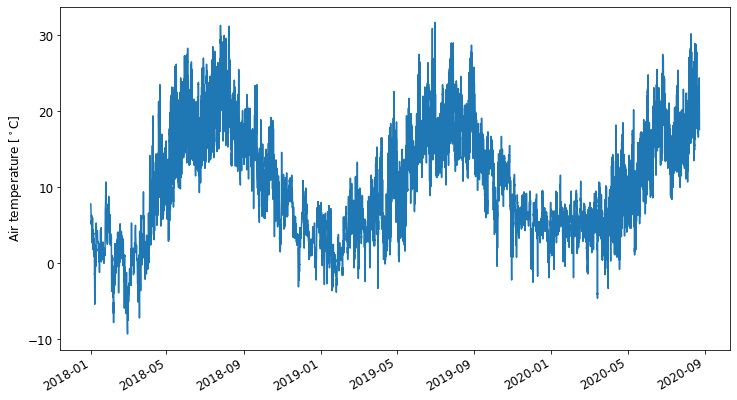

In [63]:
df2 = df.set_index(['time', 'parameterId']).drop_duplicates().unstack(level=-1)['value']

params = ['temp_dry'] # Chosing which parameters to plot

# Generate plot of data
ax = df2[params].interpolate().plot(figsize=(12,7), legend=False, fontsize=12, subplots=True)
#ax[0].set_ylabel('Wind speed [m/s]', size=12)
#ax[1].set_ylabel('Humidity [%]', size=12)
ax[0].set_ylabel('Air temperature [$^\circ$C]', size=12)
ax[0].set_xlabel('', size=12)



Henter data fra 1/1-2018 - nu
For DMI aka KBH - stationId: 06184

TO DO:
dayly average loop
